In [143]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import shapiro

## Загрузить файл hr.csv.

In [144]:
data=pd.read_csv('hr.csv.')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [145]:
data['salary'] = data['salary'].map({'low': 1, 'medium': 2, 'high': 3}) 

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [147]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [148]:
#медиана
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
salary                     2.00
dtype: float64

In [149]:
# мода
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## Рассчитать и визуализировать корреляционную матрицу для переменных.

In [150]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


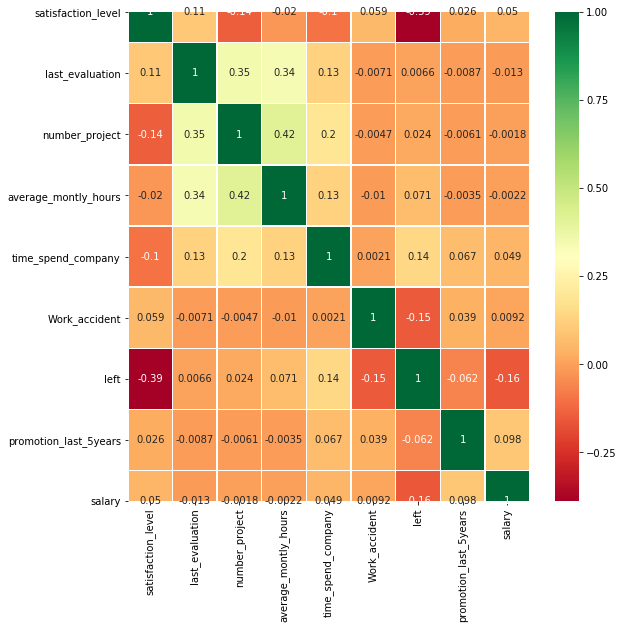

In [151]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

наблюдается отриц. корреляция атрибутов 'left' и'satisfaction_level'

## Визуализировать несколько взаимосвязей между переменными.

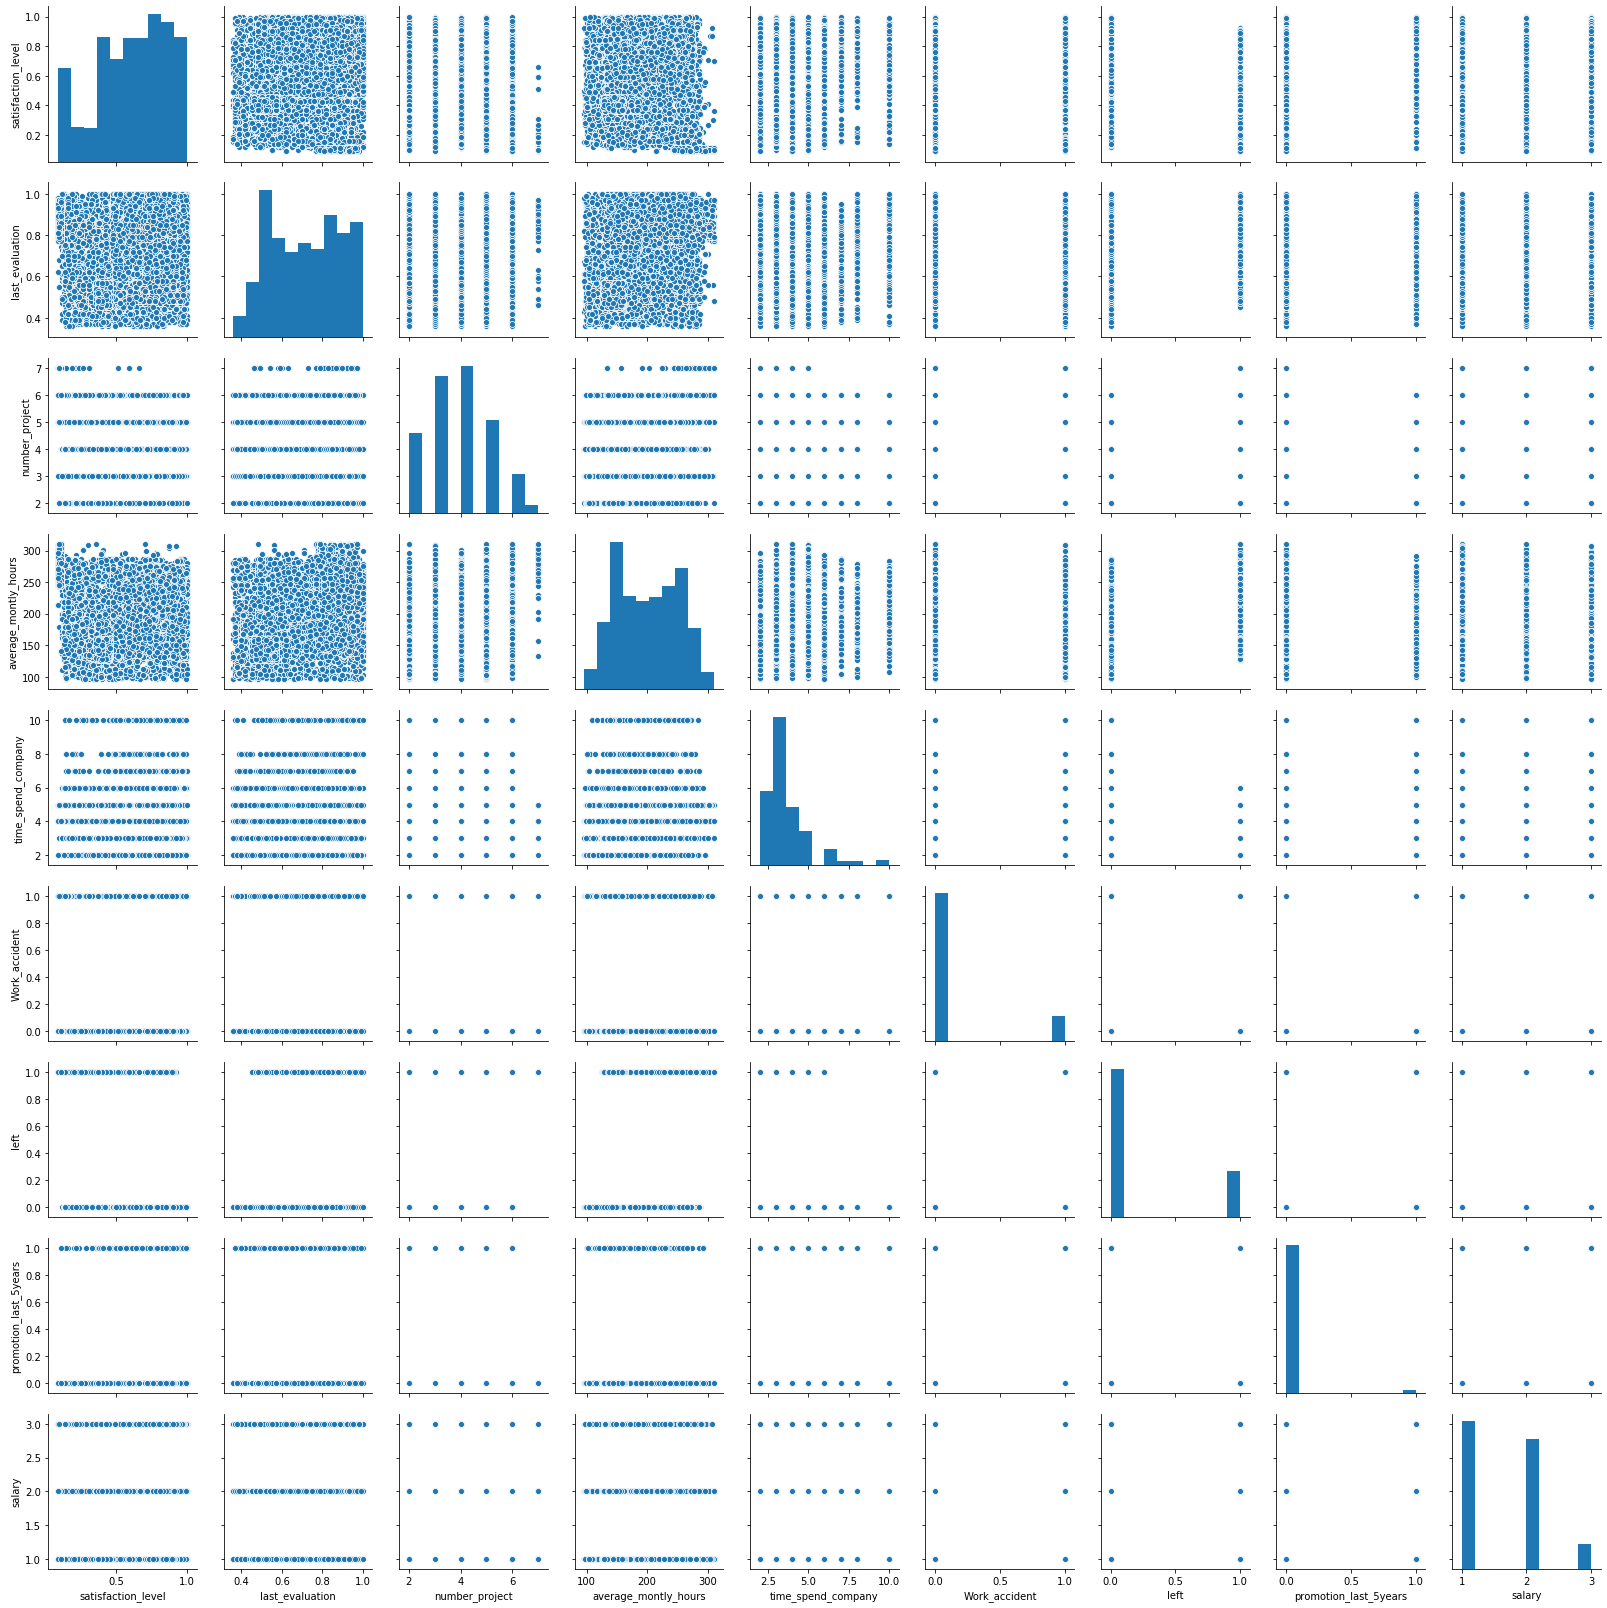

In [152]:
g = sns.pairplot(data)

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [159]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(data['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))


stat=0.952, p=0.000


In [154]:
left = data[data['left']==1]['last_evaluation']
print(left.mean())
print(data['last_evaluation'].mean())
stats.ttest_1samp(left, data['last_evaluation'].mean())

0.7181125735088183
0.7161017401159978


Ttest_1sampResult(statistic=0.6078870291631877, pvalue=0.5433010700614106)

Проверка на статическую взаимосвязь оценкой сотрудников ранее между теми сотрудниками, кто остался и ушёл из фирмы.

In [155]:
res_t_test0 = data[data['left']==0]['last_evaluation']

res_t_test1 = data[data['left']==1]['last_evaluation']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)


Проверка на статическую взаимосвязь уровня удовлетворённости работников между теми работниками, кто остался и ушёл из фирмы.

In [156]:
res_t_test0 = data[data['left']==0]['satisfaction_level']

res_t_test1 = data[data['left']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


Проверка на статическую взаимосвязь оценкой работников ранее между теми работниками, у кого был несчастный случай на работе и не был.

In [157]:
res_t_test0 = data[data['Work_accident']==0]['last_evaluation']

res_t_test1 = data[data['Work_accident']==1]['last_evaluation']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=0.8700290350249095, pvalue=0.38429846201039486)


Проверка на статическую взаимосвязь уровня удовлетворённости работников между теми работниками, у кого был несчастный случай на работе и не был.

In [158]:
res_t_test0 = data[data['Work_accident']==0]['satisfaction_level']

res_t_test1 = data[data['Work_accident']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-7.200610639695171, pvalue=6.279179915219481e-13)


## Рассчитать сколько работников работает в каждом департаменте.

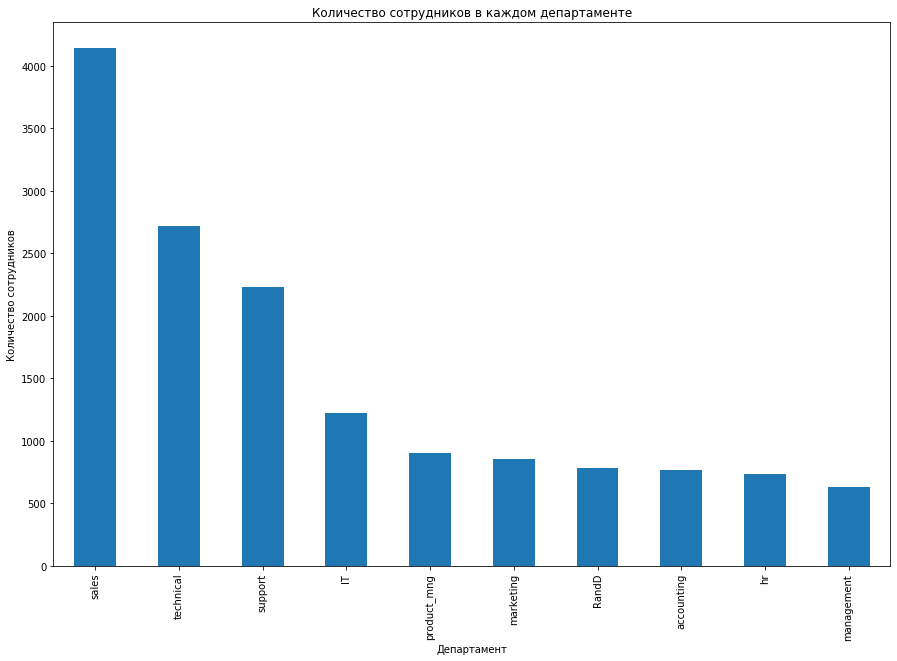

,index,sales_count,sales_perc
0,sales,4140,0.2760
1,technical,2720,0.1813
2,support,2229,0.1486
3,IT,1227,0.0818
4,product_mng,902,0.0601
5,marketing,858,0.0572
6,RandD,787,0.0525
7,accounting,767,0.0511
8,hr,739,0.0493
9,management,630,0.0420


In [160]:
data.sales.value_counts().plot(kind='bar', figsize=(15, 10))

plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников в каждом департаменте')

plt.show()

pd.merge(
        data.sales.value_counts().to_frame().reset_index(),
        data.sales.value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )


## Показать распределение сотрудников по зарплатам.

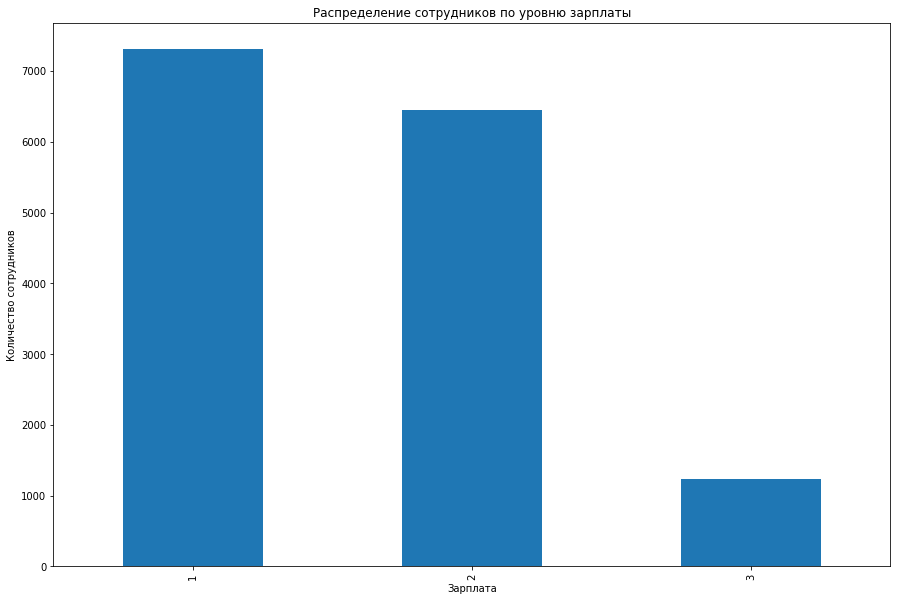

,index,salary_count,salary_perc
0,1,7316,0.4878
1,2,6446,0.4298
2,3,1237,0.0825


In [161]:
data['salary'].value_counts().plot(kind='bar', figsize=(15, 10))

plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title("Распределение сотрудников по уровню зарплаты")

plt.show()

pd.merge(
        data['salary'].value_counts().to_frame().reset_index(),
        data['salary'].value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )


## Показать распределение сотрудников по зарплатам совместно с департаментами.

In [162]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

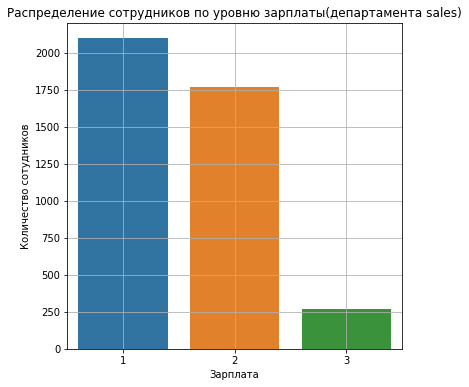

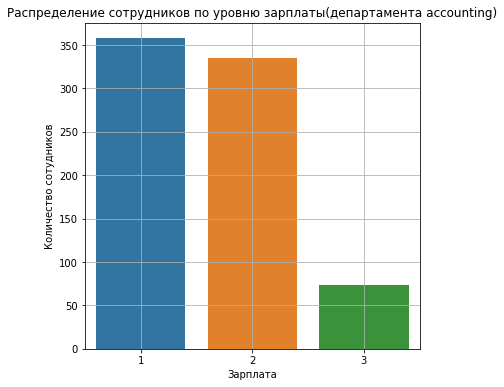

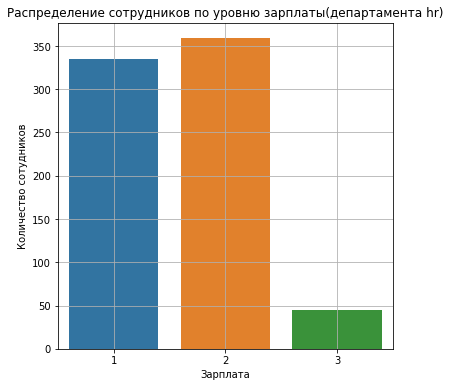

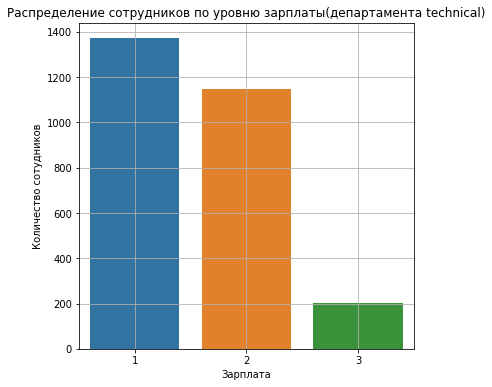

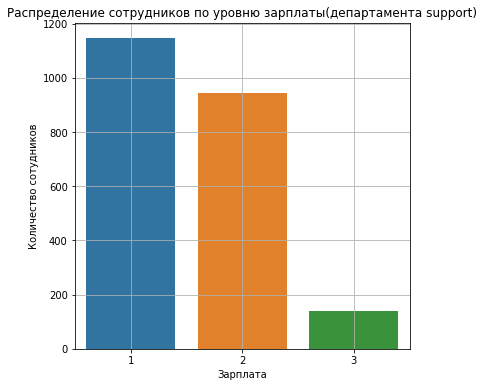

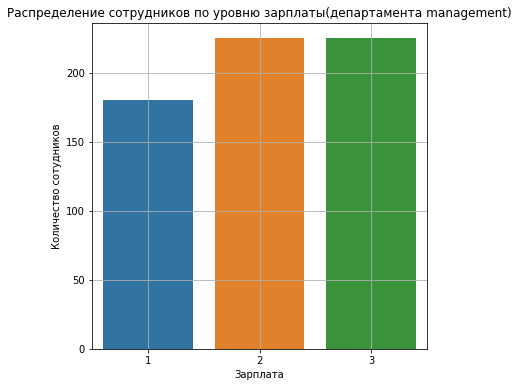

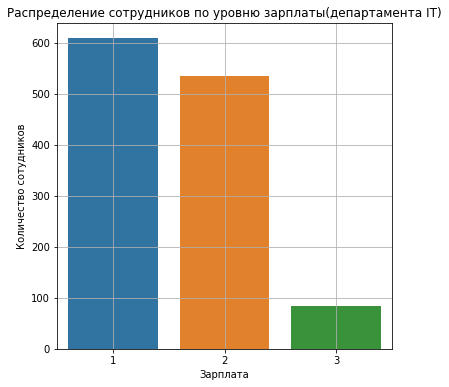

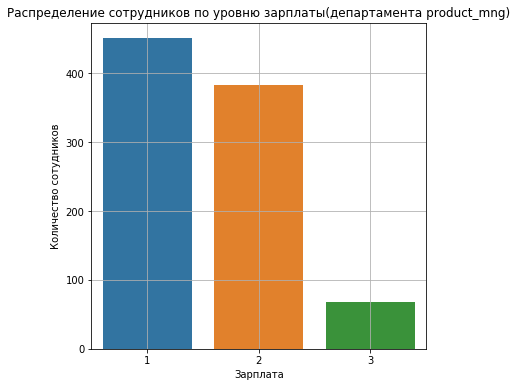

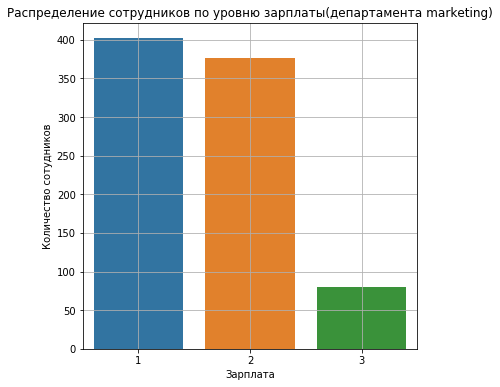

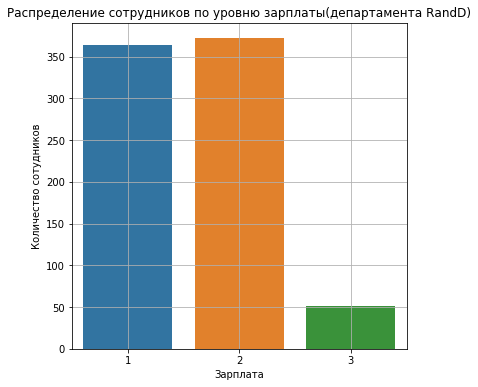

In [163]:
for x in data['sales'].unique():
    y = data[ data.sales == x]
    amount1 = y.groupby('salary').count().reset_index()
    amount1_workers = amount1[['salary','satisfaction_level']]
    amount1_workers.columns = ['salary','Count']
    amount1_workers=amount1_workers.sort_values(by='Count')
    
    f, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(x=amount1_workers['salary'], y=amount1_workers['Count'])
    
    plt.xlabel('Зарплата')
    plt.ylabel('Количество сотудников')
    plt.title('Распределение сотрудников по уровню зарплаты(департамента '+str(x)+')')
    plt.grid()
plt.show()

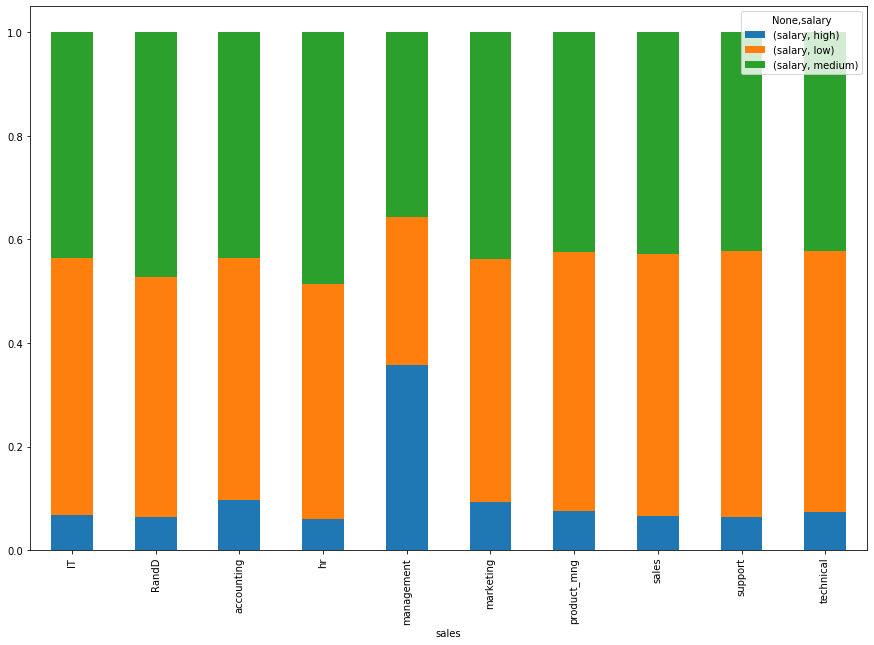

salary             
salary        high   low medium
sales                          
IT             6.8  49.6   43.6
RandD          6.5  46.3   47.3
accounting     9.6  46.7   43.7
hr             6.1  45.3   48.6
management    35.7  28.6   35.7
marketing      9.3  46.9   43.8
product_mng    7.5  50.0   42.5
sales          6.5  50.7   42.8
support        6.3  51.4   42.3
technical      7.4  50.4   42.2

In [84]:
data.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().plot(kind='bar', stacked=True, figsize=(15, 10))
plt.show()

data.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().round(3)*100

## Сколько сотрудников покинули компанию.

In [164]:
print('Количество сотрудников, покинувших компанию:', data['left'].sum())

Количество сотрудников, покинувших компанию: 3571


## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [168]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

С помощью критерия Манна-Уитни определим, ест ли зависимость ухода сотрудников от уровня их дохода.

In [169]:
low = data[data['salary']==1]['left']
medium = data[data['salary']==2]['left']
high = data[data['salary']==3]['left']
u, p_value = stats.mannwhitneyu(low, medium, high)
p_value[0]

6.478441511630743e-36

Используем модель случайного леса для поиска наиболее важных для модели атрибутов. Эти признаки будут наиболее сильно влять на таргет (left)

In [170]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [171]:
def sales_n(a):
    if a == 'sales':
        return 1
    elif a == 'accounting':
        return 2
    elif a == 'hr':
        return 3
    elif a == 'technical':
        return 4
    elif a == 'support':
        return 5
    elif a == 'management':
        return 6
    elif a == 'IT':
        return 7
    elif a == 'product_mng':
        return 8
    elif a == 'marketing':
        return 9
    elif a == 'RandD':
        return 10

In [172]:
df_1 = data.copy()
df_1['sales_n'] = data['sales'].apply(sales_n)

drop_coloms_1 = ['sales']
df_1.drop(drop_coloms_1, axis=1, inplace = True)
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_n
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,2,1
2,0.11,0.88,7,272,4,0,1,0,2,1
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [173]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
sales_n                  14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [174]:

X = df_1.drop('left', axis=1)
y = df_1.left

In [175]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [176]:
model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

In [177]:
model.score(X_test, y_test)

0.994

Точность предсказания модели очень высока. Теперь найдем наиболее значимые атрибуты для модели.

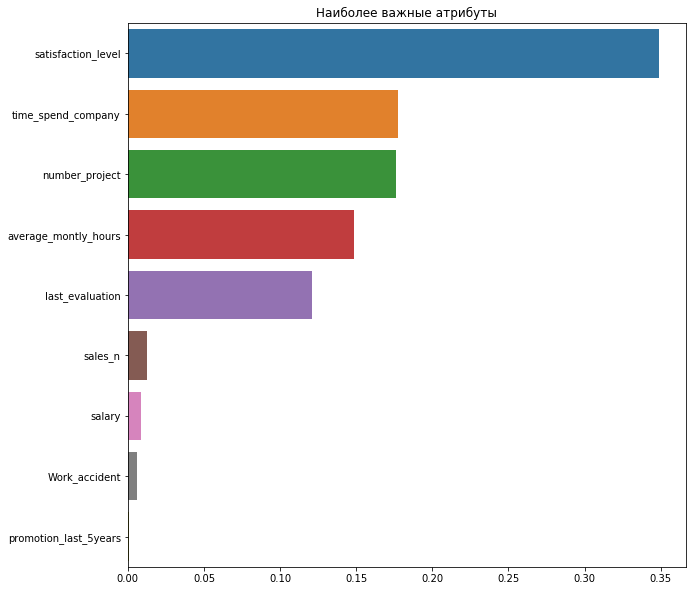

In [178]:

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.title("Наиболее важные атрибуты")
plt.show()

    Наибольшее влияние на уход сотрудников оказывет уровень их удовлетворенности в компании (в т.ч. смотрите п.10.1)
Также сильное вляние оказывают параметры:

    количество времени, проведенное в компании,

    количество проектов,

    среднее количество часов, отрабатываемых в месяц, (выше мы видели, что у уволенных сотрудников распределение рабочего времени сильно перекошено к минимуму и максимуму - седло - в отличие отработающих сотрудников, у которых распределение раюочего времени стремится к нормальному. Необходимо обращать внимание на загрузку сотруднико и приводить ее к средним показателям без перекосов (равномерно распределять по сотрудникам).

    оценка сотрудника (аналогично среднему количеству часов, график приведен выше)

Text(0.5, 1.0, 'Влияние проведенного в компании времени на уход сотрудников')

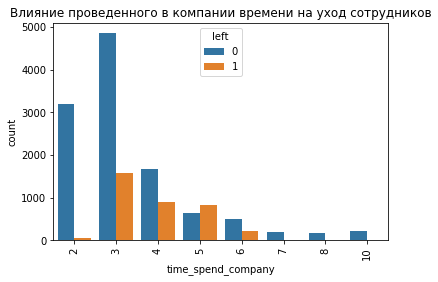

In [179]:
sns.countplot(x='time_spend_company', hue='left', data=data)
plt.xticks(rotation=90)
plt.title("Влияние проведенного в компании времени на уход сотрудников")

Из графика видно, что наиболее кризисными с точки зрения увольнения из компании является четвертый-шестой годы работы. На пеятом нгоду работы, мы видим, по статистике увольняется больше человек, чем остается.

Text(0.5, 1.0, 'Влияние количества проектов на уход сотрудников')

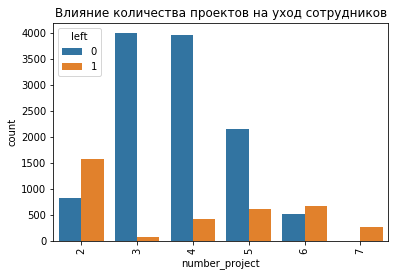

In [180]:
sns.countplot(x='number_project', hue='left', data=data)
plt.xticks(rotation=90)
plt.title("Влияние количества проектов на уход сотрудников")

Здесь ситуация похожа на ситуацию с загрузкой сотрудников по часам. Если сотрудник недозагружен или перегружен проектами, увеличивается вероятность, что он уволится/будет уволен.